## Генеральная совокупность и выборка ##
- **Генеральная совокупность** — совокупность всех объектов, относительно которых предполагается делать выводы. 
- **Репрезентативная выборка** –  это такая выборка, в которой все основные признаки генеральной совокупности, из которой извлечена данная выборка, представлены приблизительно в той же пропорции или с той же частотой, с которой данный признак выступает в этой генеральной совокупности.


## Способы репрезентативной выборки:
   - **Простая случайная выборка (simple random sample)**
   - **Стратифицированная выборка (stratified sample)** – из генеральной совокупности выделяются группы с однородными признаками
   - **Групповая выборка (cluster sample)** – похожие группы выбираются из выборки и далее делается случайная выборка (например, районы одного города)


## Типы переменных
**Количественные (вариационные) характеристики**  – это характеристики, которые можно выразить числами. Их подразделяются на дискретные и непрерывные.
- **Непрерывные переменные** – это переменные, которые выражаются действительными числами.
- **Дискретные переменные** - это переменные, которые выражаются только целыми числами.


**Качественные характеристики** – это характеристики, которые не выражаются числами. 
- **Номинативные** - цифры как имена групп, не для расчетов.
- **Ранговые** – похоже на номинативные, только возможны сравнения (быстрее/медленнее и т.п.)



## Меры центральной тенденции
Выборки характеризуются центральными тенденциями: **средним значением, модой и медианой**. 
- Средним значением выборки называют среднее арифметическое всех её значений. 
- Мода выборки – наиболее часто встречающееся значение. 
- Медиана выборки – середина упорядоченного ряда значений.

In [1]:
'''Расчёт моды, медианы и среднего с помощью библиотек numpy и scipy'''
import numpy as np
from scipy import stats
sample = np.array([185, 175, 170, 169, 171, 175, 157, 172, 170, 172, 167, 173, 168, 167, 166,
              167, 169, 172, 177, 178, 165, 161, 179, 159, 164, 178, 172, 170, 173, 171])
# в numpy почему-то нет моды
print('mode:', stats.mode(sample, keepdims=True))
print('median:', np.median(sample))
print('mean:', np.mean(sample))

mode: ModeResult(mode=array([172]), count=array([4]))
median: 170.5
mean: 170.4


In [2]:
'''Расчёт моды, медианы и среднего с помощью библиотеки pandas'''
import pandas as pd
sample = pd.Series([185, 175, 170, 169, 171, 175, 157, 172, 170, 172, 167, 173, 168, 167, 166,
              167, 169, 172, 177, 178, 165, 161, 179, 159, 164, 178, 172, 170, 173, 171])

print('mode:', sample.mode())
print('median:', sample.median())
print('mean:', sample.mean())

mode: 0    172
dtype: int64
median: 170.5
mean: 170.4


## Меры изменчивости
### Размах
 Это разность между максимальным и минимальным значениям выборки. Крайне чувствителен к взбросам.
 ### Дисперсия
 
 Это средний квадрат отклонений индивидуальных значений признака от их средней величины
 
 #### Для генеральной совокупности
 $$D = \frac{\sum_{i=1}^{n} (x_{i} - M_{x})^2}{n}$$
 Среднеквадратическое отклонение
 $$ \sigma = \sqrt{D}$$
 #### Для выборки
 $$D = \frac{\sum_{i=1}^{n} (x_{i} - M_{x})^2}{n-1}$$
 где 1 это количество степеней свободы
 Важно отменить, что среднеквадратическое отклонение для выборки обозначают по другому, как **sd** - standart deviation

 #### Почему именно квадрат, а не модуль или куб?

 Модуль не берут потому, что модуль - не гладкая функция. В нуле у модуля имеется "излом" из-за которого у производной происходит разрыв.
 А очень многие математические теоремы, которые наверняка потребуются дальше, работают только на гладких функциях.
 
 Вообще, с не гладкими функциями работать не любят. Там все становится сложнее. Поэтому берется квадрат.
 
 #### Свойства дисперсии
 
 $$ D_{x+c} = D_x $$
 $$ D_{x*c} = D_x+c^2 $$
 
 ### Квартили распределения
 **Квартили** - это три точки(значения признака), которые делят **упорядочное** множество данных на 4 равные части.

 **Box plot** - такой вид диаграммы в удобной форме показывает медиану, нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы.
  
 Квартили и inter quartile range используют, чтобы оценить наличие выбросов. Алгоритм расчета - посчитали квартили, посчитали разницу между ними, вычислили теоретический максимум и минимум, сравнили с имеющимся и выяснили есть ли у вас выбросы и сколько их. Если много, то нужно анализировать и решать брать ли их в выборку или нет. 

In [3]:
'''Расчитываем размах и стандартное отклонение с помощью numpy'''
import numpy as np
sample = np.array([185, 175, 170, 169, 171, 175, 157, 172, 170, 172, 167, 173, 168, 167, 166,
              167, 169, 172, 177, 178, 165, 161, 179, 159, 164, 178, 172, 170, 173, 171])

# The name of the function comes from the acronym for ‘peak to peak’.
print(f'Range: {np.ptp(sample)} is equal max - min: {np.max(sample)- np.min(sample)}')

# ddof - Delta Degrees of Freedom
print(f'Standard deviation: {np.std(sample, ddof=1):.2f}')


Range: 28 is equal max - min: 28
Standard deviation: 6.00


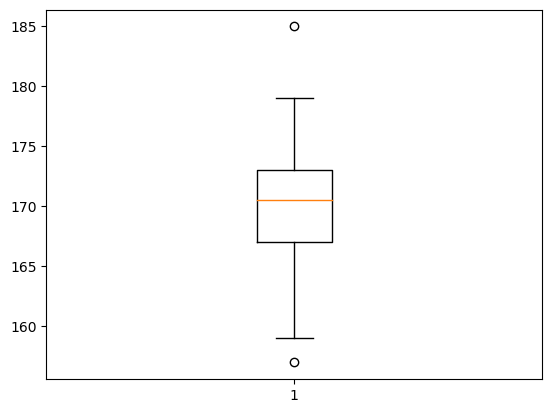

In [4]:
'''с помощью диаграммы boxplot мы можем узнать медиану, 2 и 3 квартиль'''
import matplotlib.pyplot as plt

plt.boxplot(sample, showfliers=1)
plt.show()


## Нормальное распределение
 **Коротко**
  - Унимодально
  - Симметрично
  - Отклонения наблюдений от среднего подчиняются определённому вероятностному закону
  
 **Подробно**
 
 Нормальное распределение возникает в результате воздействия множества факторов, вклад каждого из которых очень мал.
 
 Для облегчения этого восприятия в 1873 году Фрэнсис Гальтон сделал устройство, которое в последствии назвали Доской Галтона (или квинкункс). Суть простая: сверху по середине подаются шарики, которые при прохождении нескольких уровней (например, 10-ти) на каждом уровне сталкиваются с препятствием, и при каждом столкновении отскакивают либо влево, либо вправо (с равной вероятностью).
 
Результат прохождения - это распределение, стремящееся к нормальному!
 Или в виде кода:

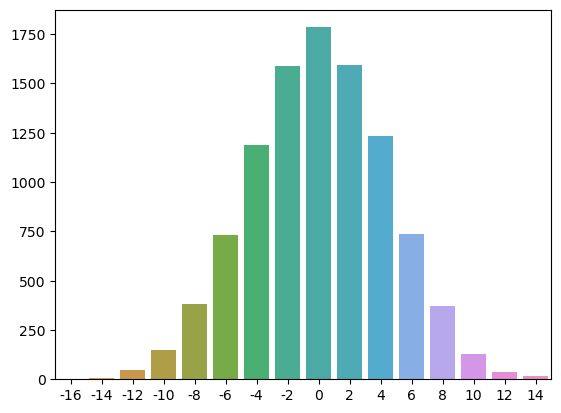

In [5]:
'''Иммитация доски Гальтона в коде'''
import seaborn as sns
data = dict()
# количество шариков
N = 10000
# количество уровней
level = 20
for _ in range(N):
    index = 0
    for _ in range(level):
        index += np.random.choice([-1, 1])
    data.setdefault(index, 0)
    data[index] += 1
sns.barplot(x=list(data.keys()), y=list(data.values()));

 Выглядит это так:
 <img src="img/galton.gif" width=500>

In [6]:
def pascal_triangle(levels):
    # Initialize an empty list to store the rows of the triangle
    triangle = []
    # Loop over the number of levels
    for i in range(levels):
        # If this is the first level, add [1] to the triangle
        if i == 0:
            triangle.append([1])
        # If this is the second level, add [1, 1] to the triangle
        elif i == 1:
            triangle.append([1, 1])
        # For all other levels, calculate the new row using the previous row
        else:
            previous_row = triangle[i-1]
            current_row = [1]
            for j in range(1, i):
                current_row.append(previous_row[j-1] + previous_row[j])
            current_row.append(1)
            triangle.append(current_row)
    # Return the triangle
    return triangle

# Main function
if __name__ == "__main__":
    levels = 7
    # Call the pascal_triangle function with the desired number of levels
    triangle = pascal_triangle(levels)
    # Loop over the rows of the triangle and print each one, with appropriate spacing to form a triangle shape
    for i in range(len(triangle)):
        print(" " * (levels - i - 1), end="")
        for j in range(len(triangle[i])):
            print(triangle[i][j], end=" ")
        print("")

      1 
     1 1 
    1 2 1 
   1 3 3 1 
  1 4 6 4 1 
 1 5 10 10 5 1 
1 6 15 20 15 6 1 


### Z-преобразование

*Z-преобразование* (z-score transformation) в статистике - это метод нормализации данных, который позволяет сравнивать значения измеряемой величины в разных группах или в разные периоды времени. Преобразование полученных данных в стандартную Z-шкалу (Z-scores) со средним M = 0, D = 1

Для преобразования значения X в z-score, используется формула:

z = (X - μ) / σ

где X - исходное значение, μ - среднее значение выборки, σ - стандартное отклонение выборки.

Z-score показывает, сколько стандартных отклонений находится исходное значение от среднего. Это позволяет сделать значения измеряемой величины независимыми от единицы измерения и использовать их для сравнения или для проведения статистических вычислений.


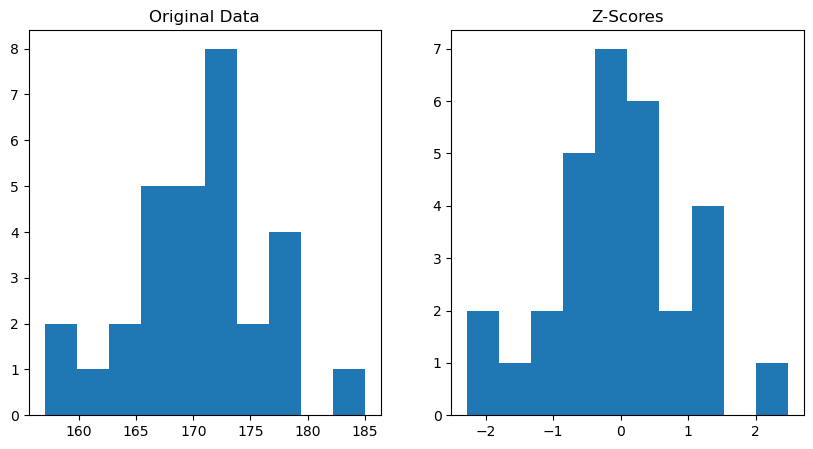

In [7]:
data = np.array([157, 159, 161, 164, 165, 166, 167, 167, 167, 168, 169, 169, 170, 170, 170, 171, 171, 172, 172, 172, 172, 173, 173, 175, 175, 177, 178, 178, 179, 185])

# Calculate the mean and standard deviation of the data
mean = np.mean(data)
std = np.std(data)

# Calculate the z-scores of the data
z_scores = (data - mean) / std

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
# Plot the original data
ax1.hist(data, bins=10)
ax1.set_title('Original Data')
# Plot the z-scores
ax2.hist(z_scores, bins=10)
ax2.set_title('Z-Scores')

# Show the plot
plt.show()



## Правило 3х-сигм
# 
# <img src="img/3-sigma.svg">

<img src="img/notations.png" width=750>


## Центральная предельная теорема
Гласит, что множество средних выборок из генеральной совокупности (ГС необязательно иметь нормальное распределние) будут иметь нормальное распределение. Причём средняя этого распределения будет близко к средней генеральной совокупности, а стандарное отклонение этого распределение будет называться **стандарной ошибкой среднего** (se).

 Зная стандартное отклонение ГС и размер выборки мы можем рассчитать **стандартную ошибку среднего**.

 $$ se = \frac{\sigma}{\sqrt{N}} $$
 
 где N - размер выборки. Если размер выборки достаточно большой (>30) и она является репрезативна, то вместо стандарного отклонения ГС мы можем взять стандарное отклонение выборки.
 
 $$ se = \frac{sd}{\sqrt{N}} $$
 
 Стандартная ошибка среднего - это среднеквадратическое отклонение распределения выборочных средних

## Доверительные интервалы для среднего
Если мы имеем некоторую выборку и ГС, то мы **не можем точно** знать среднюю ГС, зная только среднее выборки. Однако **мы можем сказать, с некоторым процентом уверенности**, в каком интервале лежит средняя ГС. Понятно дело, что для нас лучше, чтобы этот интервал был как можно меньше, как это сделать?

Мы знаем, средняя средних выборок, стремится к средней ГС, также мы знаем, что стандартная ошибка среднего описывает стандартное отклонение распределения средних выборок. Если мы возьмём случайную выборку $X$ и найдём её среднее $\bar{X}$, а также вычислим стандартную ошибку $se$, то мы можем вычислить доверительный интевал $[\bar{X} - 1.96*se; \bar{X} + 1.96*se]$ который описывает среднюю ГС с некотором интервале с 95% доверия.

- Загадочное число **1,96** это количество сигм $\sigma$ в нормальном распределение, необходимые, чтобы охватить **95%** значений в этом распределнии.

<img src="img/norm_196.png" width=200>
Кстати для 99% будет коэффициент будет 2,58

### Если мы рассчитали 95% доверительный интервал для среднего значения, это значит:
 - Мы можем быть на 95% уверены, что среднее значение в генеральной совокупности принадлежит рассчитанному доверительному интервалу.
 - Если многократно повторять эксперимент, для каждой выборки рассчитывать свой доверительный интервал, то в 95 % случаев истинное среднее будет находиться внутри доверительного интервала.



In [8]:
'''Вычисление 1.96 c помощью scipy'''
from scipy import stats

# 5%
p = 0.95
# так как у нас двухсторонний интервал, сделаем вычисление
alpha = (1-p)/2
# isf - Inverse survival function (inverse of sf) 
print(f'{stats.norm().isf(alpha):.2f} sigma')

1.96 sigma


In [9]:
'''Рассчитайте 99% доверительный интервал для следующего примера: 
среднее = 10, стандартное отклонение = 5, размер выборки = 100
'''
from numpy import sqrt
from scipy import stats

p = 0.99
mean = 10
std = 5
n = 100

se = std/sqrt(n)
alpha = (1-p)/2
sigma = stats.norm().isf(alpha)
сonfidence_interval = mean - sigma*se, mean + sigma*se
print('[%.2f; %.2f]' % сonfidence_interval)

[8.71; 11.29]


## Идея статистического вывода
### Статистическая проверка гипотез
<img src="img/false_pos_neg.jpeg" width=500>

### p-уровень значимости
p-value — это вероятность получить такие или более выраженные различия при условии, что в генеральной совокупности никаких различий на самом деле нет
 
P-уровень значимости - это вероятность того, что наблюдаемые результаты (в статистике) произошли случайно по сравнению с некоторой гипотезой. Чем меньше p-уровень значимости, тем меньше вероятность того, что результаты являются случайными, и тем более значимыми они считаются.

Например, если p-уровень значимости равен 0,05, это означает, что есть 5% вероятность того, что наблюдаемые результаты являются случайными. Если p-уровень значимости меньше 0,05, результаты считаются статистически значимыми.
 
 

> Допустим, у вас есть группа людей, которые принимают новый лекарственный препарат, и другая группа, которая принимает плацебо (фальшивый препарат). Вы хотите определить, действительно ли новый препарат влияет на здоровье людей. Вы измеряете улучшение здоровья у каждого человека в обеих группах и сравниваете результаты. Если улучшение здоровья у людей, которые принимали новый препарат, статистически значимо выше, чем у тех, кто принимал плацебо, вы можете сделать вывод о том, что новый препарат действительно влияет на здоровье. P-уровень значимости здесь используется для определения вероятности того, что результаты являются случайными, и что улучшение здоровья не связано с приемом нового лекарственного препарата. Обычно принятым уровнем значимости является 0,05, то есть, если P-уровень меньше 0,05, результаты считаются статистически значимыми.
>Таким образом, если P-уровень меньше 0,05, вы можете сделать вывод о том, что новый лекарственный препарат действительно влияет на улучшение здоровья. Если P-уровень выше 0,05, результаты считаются незначимыми, и вы не можете сделать уверенных выводов о влиянии нового препарата на здоровье.

## T-распределение
Распределение Стьюдента по сути представляет собой сумму нескольких нормально распределенных случайных величин. Чем больше величин, тем больше верятность, что их сумма будет иметь нормальное распределение. Таким образом, количество суммируемых величин определяет важнейший параметр формы данного распредения - число степеней свободы.

<img src="img/z.png" width=120>
то эта величина z будет иметь стандартное нормальное распределение со средним равным нулю и стандартным отклонением равным единице.

Обратите внимание, что для расчета стандартной ошибки мы используем именно стандартное отклонение в генеральной совокупности.
σ. Ранее мы уже обсуждали, что на практике σ нам практически никогда не известна, и для расчета стандартной ошибки мы используем выборочное стандартное отклонение.
Так вот, строго говоря в таком случае распределение отклонения выборочного среднего и среднего в генеральной совокупности, деленного на стандартную ошибку, теперь будет описываться именно при помощи t - распределения.
<img src="img/t.png" width=120>
таким образом, в случае неизвестной σ мы всегда будем иметь дело с t - распределением. 

Поэтому, правильнее будет сказать, что мы используем t - распределение не потому что у нас маленькие выборки, а потому что мы не знаем стандартное отклонение в генеральной совокупности. 

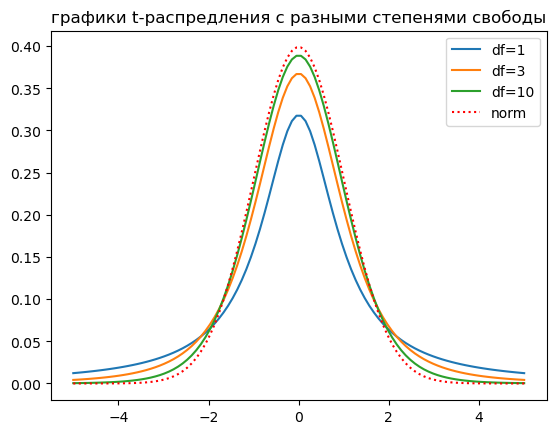

In [10]:
'''График снизу показывает, как меняется форма распределения при увеличение количества степеней свободы.
А также показывает приближение t-распределения к нормальному по мере увеличения степеней свободы.'''
from scipy.stats import t, norm
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, 100)
y1, y2, y3 = t.pdf(x, df=1), t.pdf(x, df=3), t.pdf(x, df=10)
y4 = norm.pdf(x)

plt.title('графики t-распредления с разными степенями свободы')
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4, 'r:')
plt.legend(('df=1', 'df=3', 'df=10', 'norm'))
plt.show()

**Использование t-распределения уменьшает вероятность совершить ошибку первого рода, то есть отклонить нулевую гипотезу, когда она верна.**

**Степерь свободы (в статистике)** - это сколько единиц информации нам нужо получить об известном нам объекте, чтобы ОДНОЗНАЧНО понять его полное состояние.

Например:
>Монета. Имеет два состояния - орел/решка. Если нам сказали, что монета лежит орлом вверх, мы понимаем, что снизу решка.  Одна степень свободы (задали один вопрос), два состояния.

>Светофор. Имеет три состояния - красный/оранжевый/зеленый. Если нам сказали, что оранжевый не горит, мы озадачены. Далее нам сказали, что И красный не горит, теперь мы точно значем всю информацию. Значит ТОЧНО горит зеленый.  Две степени свободы (задали два вопроса), три состояния.

 ## Сравнение двух средних. t-критерий Стьюдента
 
 t-критерий Стьюдента — общее название для статистических тестов, в которых статистика критерия имеет распределение Стьюдента. Наиболее часто t-критерии применяются для проверки равенства средних значений в двух выборках. Нулевая гипотеза предполагает, что средние равны (отрицание этого предположения называют гипотезой сдвига). Для применения данного критерия необходимо, чтобы исходные данные имели нормальное распределение. 
 
 $$ t = \frac{\bar{X_1} - \bar{X_2}}{se}$$
 
 $$ se = \sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}} $$
 
 Откуда берётся такая формула $se$?:
 
 $$ (se_1)^2 = (\frac{sd_1}{\sqrt{n_1}})^2 = \frac{sd_1^2}{n_1} $$
  
 То есть:
 
 $$ se = \sqrt{\frac{sd_1^2}{n_1} + \frac{sd_2^2}{n_2}} = \sqrt{se_1^2 + se_2^2} $$
 
 причем ответ на вопрос, почему верно это равенство, кроется в свойстве дисперсии: дисперсия суммы независимых случайных величин равна сумме их дисперсий. а отклонение - это корень из дисперсии. отсюда ваша последняя формула


### Примеры применения t-критерий Стьюдента
 **Пример 1.** Первая выборка — это пациенты, которых лечили препаратом А. Вторая выборка — пациенты, которых лечили препаратом Б. Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) Требуется выяснить, имеется ли значимое различие эффективности препаратов А и Б, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики.

 **Пример 2.** Первая выборка — это значения некоторой характеристики состояния пациентов, записанные до лечения. Вторая выборка — это значения той же характеристики состояния тех же пациентов, записанные после лечения. Объёмы обеих выборок обязаны совпадать; более того, порядок элементов (в данном случае пациентов) в выборках также обязан совпадать. Такие выборки называются связными. Требуется выяснить, имеется ли значимое отличие в состоянии пациентов до и после лечения, или различия чисто случайны.

 **Пример 3.** Первая выборка — это поля, обработанные агротехническим методом А. Вторая выборка — поля, обработанные агротехническим методом Б. Значения в выборках — это урожайность. Требуется выяснить, является ли один из методов эффективнее другого, или различия урожайности обусловлены случайными факторами.
 
 **Пример 4.** Первая выборка — это дни, когда в супермаркете проходила промо-акция типа А (красные ценники со скидкой). Вторая выборка — дни промо-акции типа Б (каждая пятая пачка бесплатно). Значения в выборках — это показатель эффективности промо-акции (объём продаж, либо выручка в рублях). Требуется выяснить, какой из типов промо-акции более эффективен.

### Примеры

In [11]:
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

array1 = np.array([84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0,
                   119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5])
array2 = np.array([57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7,
                   102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5])

# считаем количество элементов, среднее, стандартное отклонение и стандартную ошибку
df = pd.DataFrame({'Выборка 1':array1, 'Выборка 2':array2}).agg(['mean','std','count','sem']).transpose()
df.columns = ['Mx','SD','N','SE']

# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = t.ppf((1 + p)/2, df['Mx']-1)
df['interval'] = K * df['SE']

df

,Mx,SD,N,SE,interval
Выборка 1,100.815,10.246503,20.0,2.291188,4.545754
Выборка 2,75.735,15.458102,20.0,3.456537,6.886174


/var/folders/yy/mpkx9_p55m78gd9vxsrtlx2w0000gn/T/ipykernel_1063/756699468.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ="o")


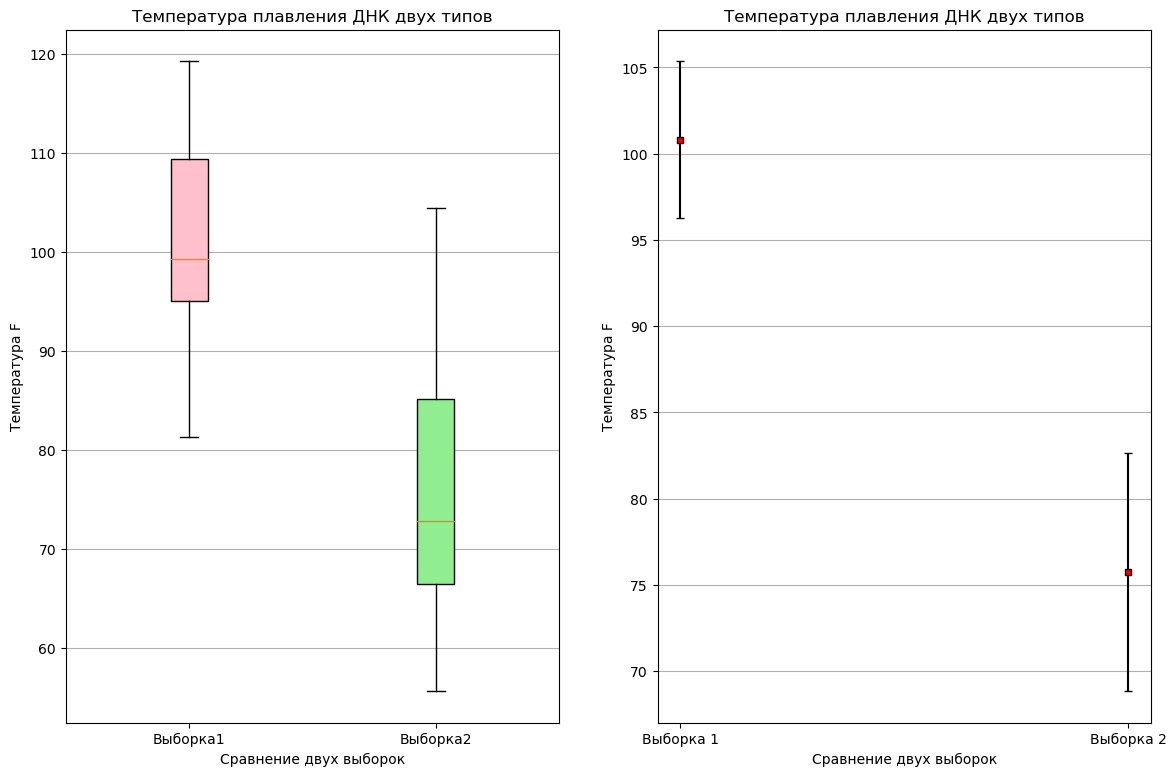

In [12]:
#строим графики, boxplot из изначальных данных array1, array2,  доверительные интервалы из датафрейма df
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# график boxplot
bplot1 = ax1.boxplot([array1, array2],
                     vert=True,  # создаем вертикальные боксы
                     patch_artist=True, # для красоты заполним цветом боксы квантилей
                     labels=['Выборка1', 'Выборка2']) # используется для задания значений выборок в случае с boxplot

# график доверительных интервалов
bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ="o")

# раскрасим boxplot  
colors = ['pink', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
# добавим общие для каждого из графиков данные
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Температура плавления ДНК двух типов')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Температура F')
    
plt.show()

## Задача
Первые премии Оскар за лучшую мужскую и женскую роль были вручены в 1929. Данные гистограммы демонстрируют распределение возраста победителей с 1929 по 2014 год (100 мужчин, 100 женщин). Используя t - критерий проверьте, можно ли считать наблюдаемые различия в возрасте между лучшими актрисами и актерами  статистически достоверными.
Средний возраст мужчин равен 45, sd = 9.
Средний возраст женщин равен 34, sd = 10.


<img src="img/solution.png" width=900>

In [13]:
import scipy.stats as st
import math
import numpy as np

x_men_bar = 45
sd_men = 9

x_w_bar = 34
sd_w = 10

n = 100
alpha = 0.95

se = math.sqrt(sd_men**2 / n + sd_w**2 / n)
t = (x_men_bar - x_w_bar) / se

df = n + n - 2

p_value = np.abs(st.t.ppf((1 - alpha) / 2, df))

print(f"""t-value: {t}
p-value for the {alpha * 100}% confidence interval: {p_value}
""")
if t > p_value: 
    print("rejecting the null hypothesis")
elif t < p_value:
    print("acepting the null hypothesis")

t-value: 8.176235608718828
p-value for the 95.0% confidence interval: 1.9720174778338955

rejecting the null hypothesis


## Проверка распределения на нормальность, QQ-Plot

Один из простых способов проверки распределения на нормальность является наложение поверх гистограммы распределения графика нормального распределения. Однако вторым способом проверки на нормальность является график QQ-плот. Этот график отражает насколько квантили действительного распределения отличаются (лежат выше или ниже) квантилей Z-распределения или нормального распределения.
На графике ниже слева: самая нижняя синяя - точка лежит выше прямой Z-распределения. Что это значит? В выборке у нас  𝑛  значений. У каждого значения есть свой квантиль распределения. Мы уже разбирали, что квантиль - это конкретное значение в выборке, ниже которого лежит определенное количество наблюдений:  𝑞0.5  - это квантиль, ниже которого лежит 50% наблюдений иначе говоря - это медиана. В крайнем левом столбце находится 4 наблюдения. Это соответствует первым четырем точкам снизу. И также видно, что на правом графике этот столбец чуть выше линии графика Z-распределения как раз таки из-за тех значений, что на графике QQ-plot находятся выше. То есть мы ожидаем что значения этих квантилей должны лежать немного ниже, чтобы вписаться в Z-распределение. Тоже самое можно сказать и о крайней верхней точке.

<img src="img/qq-plot.png" width=900>

Как видно из примера выше, при наличии малого количества наблюдений, мы не всегда можем понять к какому распределению относится наша выборка. Именно для этих целей удобно использовать график QQ-plot, по нему видно, что точки очень близко прилегают к прямой. И несложно сделать вывод о схожести с нормальный распределением.

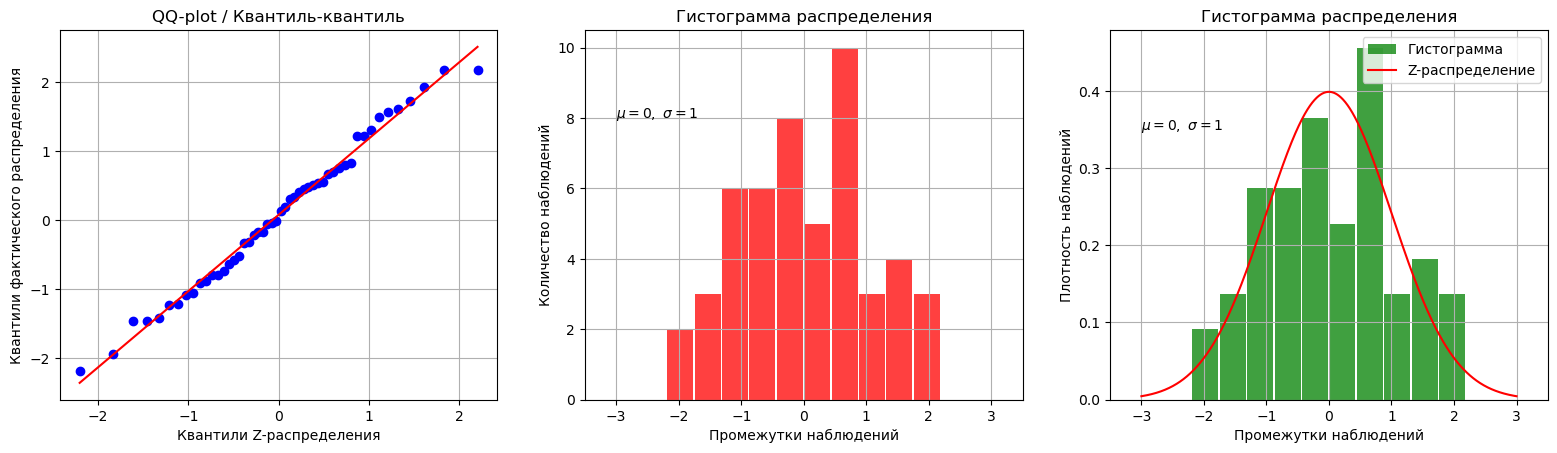

In [14]:
import numpy as np
import pylab 
import matplotlib.pyplot as plt
import scipy.stats as stats

mean = 0  # Мат. ожидание
sd = 1    # Стандартное отклонение
N = 50    # Количество наблюдений

# Построим график QQ-plot
sample = np.random.normal(loc=mean, scale=sd, size=N)  # Генерация нормального распределения с мат.ожиданием 100, стандартным отклонением 50 и количеством элементов в выборке 1000
plt.figure(figsize = [6.4*3, 4.8])  # Создаем фигуру qq_plot
plt.subplot(1, 3, 1)
norm = stats.probplot(sample, dist="norm", plot=plt)  # Создаем график QQ-plot при помощи функции по поиску квантелей значений нашего распределения
plt.title('QQ-plot / Квантиль-квантиль')  # Заголовок
plt.xlabel('Квантили Z-распределения')  # Подпись по оси X
plt.ylabel('Квантили фактического распределения')  # Подпись по оси Y
plt.grid(True)  # Включить сетку

# Построим гистограмму 
plt.subplot(1, 3, 2)
n, bins, patches = plt.hist(sample, N//5, density=False, facecolor='r', alpha=0.75, label='Гистограмма', rwidth=0.95)  # Cтроим гистограмму
plt.title('Гистограмма распределения')  # Заголовок
plt.xlabel('Промежутки наблюдений')  # Подпись по оси X
plt.ylabel('Количество наблюдений')  # Подпись по оси Y
plt.text(-3, 8, r'$\mu=0,\ \sigma=1$')  #Текстовая подпись
plt.xlim(-3.5, 3.5)  # Граница оси X
plt.grid(True)  # Включить сетку

# Построим гистограмму c плотностью
plt.subplot(1, 3, 3)
n, bins, patches = plt.hist(sample, N//5, density=True, facecolor='g', alpha=0.75, label='Гистограмма', rwidth=0.95, stacked=True)  # Cтроим гистограмму
plt.title('Гистограмма распределения')  # Заголовок
plt.xlabel('Промежутки наблюдений')  # Подпись по оси X
plt.ylabel('Плотность наблюдений')  # Подпись по оси Y
plt.text(-3, 0.35, r'$\mu=0,\ \sigma=1$')  #Текстовая подпись
plt.xlim(-3.5, 3.5)  # Граница оси X
plt.grid(True)  # Включить сетку

# Построим поверх гистограммы график Z-распределения
x = np.linspace(mean - 3*sd, mean + 3*sd, 1000)  # Делаем массив значений Z-распределения
plt.plot(x, stats.norm.pdf(x, mean, sd), color='red', label='Z-распределение')  # Строим график Z-распределения

plt.legend(loc = "upper right")  # Показать легенду
plt.show()  # Показать фигуру

Еще одной возможностью проверки распределения на нормальность является тест Шапиро-Уилко и Колмогорова-Смирнова. Мы не будем сейчас вдоваться в подробности о том, как устроены эти тесты. Однако, в этих тестах за нулевую гипотезу принимается гипотеза о том, что наша выборка принадлежит ГС, где значения распределены нормально. Поэтому при получении значения  𝑝−𝑣𝑎𝑙𝑢𝑒>0.05  у нас будет недостаточно оснований отклонить это гипотезу, а потому, мы будем считать, что имеющаяся выборка распредлена нормально.


Стоит сказать, что t-критерий Стьюдента, тест Шапиро-Уилко и тест Колмогорова-Смирнова очень сильно подвержены влияниям выбросов. Даже одно сильно отклоненное значение может искозить результаты с ног до головы. Чтобы такого не происходило, следует:

>а) Очищать выборку от выбросов до применения критериев

>б) Альтернатива: использовать тест Манн-Уитней

In [15]:
import numpy as np
import scipy.stats as stats

mean = 0  # Мат. ожидание
sd = 1    # Стандартное отклонение
N = 50    # Количество наблюдений
sample = np.random.normal(loc=mean, scale=sd, size=N)  # Генерация нормального распределения с мат.ожиданием 100, стандартным отклонением 50 и количеством элементов в выборке 1000

shapiro_test = stats.shapiro(sample)
print('Шапиро-Уилко: Выборка распредена нормально.') if shapiro_test[1] > 0.05 else print('Шапиро-Уилко: Выборка распредена ненормально.')

ks_test = stats.kstest(sample, 'norm')
print('Колмогоров-Смирнов: Выборка распредена нормально.') if ks_test[1] > 0.05 else print('Колмогоров-Смирнов: Выборка распредена ненормально.')


Шапиро-Уилко: Выборка распредена нормально.
Колмогоров-Смирнов: Выборка распредена нормально.


In [16]:
another_sample = np.random.uniform(low=-3.0, high=3.0, size=N)  # Еще одна выборка, но распределенная равномерно

mw_test = stats.mannwhitneyu(sample, another_sample)
print('Манн-Уитни: Выборка распредена нормально.') if mw_test[1] > 0.05 else print('Манн-Уитни: Выборка распредена ненормально.')

Манн-Уитни: Выборка распредена нормально.


Неожиданный результат, говорящий о том, что равномерное распределение тоже очень похоже на нормальное при малом количестве наблюдений.

## Однофакторный дисперсионный анализ

 Рассмотренный ранее **t-критерий Стьюдента** (равно как и его непараметрические аналоги) предназначен для сравнения исключительно **двух совокупностей**. В таком случае мы можем применять однофакторный дисперсионный анализ.  Та переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется **независимой переменной**. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется **зависимая переменная**. 


 $$ SS_{total} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x})^2}} = SS_{between} + SS_{within} $$
 $$ SS_{between} = \sum_{j=1}^{p}{n_j{(\bar{x}_j - \bar{x})^2}} $$
 $$ SS_{within} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x}_j)^2}} $$
 

>Чем больше дисперсия внутри групп, тем больше значение внутригруппового квадрата (при неизменном количестве наблюдений)

>Общая сумма квадратов, деленная на число всех наблюдений минус один — это и есть дисперсия, рассчитанная для всех наших наблюдений без учета деления на группы

Взаимодействие факторов в дисперсионном анализе означает, что влияние одного фактора по-разному проявляется на зависимую переменную в зависимости от градаций другого фактора. 

Ограничения желательно проверять при использовании дисперсионного анализа: нормальное распределение зависимой переменной в группах, гомогенность (однородность) дисперсий.

Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
Результат:
отклоняем нулевую гипотезу


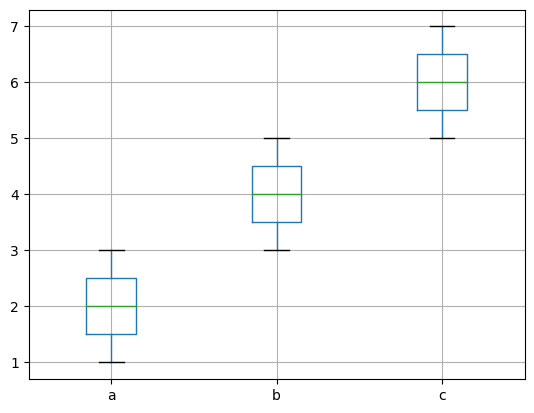

In [17]:
from scipy import stats
import pandas as pd

# Выборки которые надо сравнить
data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4],
           'c': [7, 6, 5]
          })
data.boxplot()
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')
# общая средняя
grand_mean = data.values.flatten().mean()
# отклонение групповых средний от общей средней
ssb = sum(data[group].size * (group_mean - grand_mean)**2  for group, group_mean in data.mean().items())
# отклонения значений в внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

groups = data.shape[1]
dfb = groups - 1
dfw = data.size - groups
# межгрупповой средний квадрат  
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')


### Если подбросить монетку 1000 раз, то вероятность "поймать" орла будет стремиться к 1

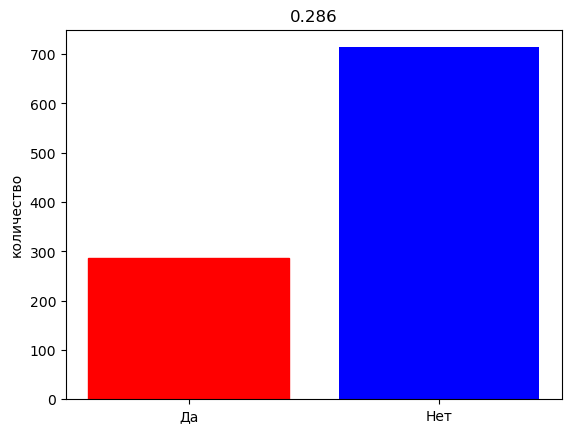

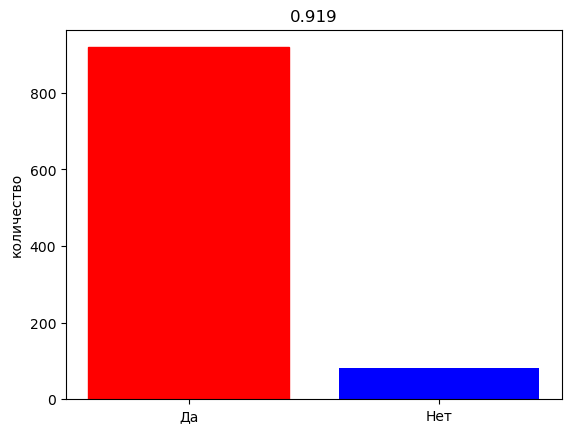

In [18]:

import scipy.stats as stats
from matplotlib import pyplot
import itertools
import numpy as np

M = 0
D = 1

def ttest(a , b):
    se = np.sqrt( a['SD']**2/a['N'] + b['SD']**2/b['N']  )
    t = (a['Mx'] - b['Mx'])/se
    dfreedom = a['N'] + b['N'] - 2
    return stats.t.sf(np.abs(t), dfreedom)*2

# m - количество выборок
# n - элементов в выборке
# a -  вероятность
def false_alarm(m, n, a):
    trys = 1000 # количество экспериментов
    hist = {'Да':0, 'Нет':0} # результаты сравнений     
    data = list(range(m)) # инициализация групп с выборками
    
    # запускаем trys экспериментов
    for i in range(trys):
        
        # наполняем m выборок, для ускорения сразу их агрегируем по SD, Mx, N
        for j in range(m):
            dt = stats.norm.rvs(loc=M, scale=D, size=n)
            data[j] = {'SD':np.std(dt, ddof = 1), 'Mx':np.mean(dt), 'N':n}
        
        #сравниваем выборки по 2 группы, перебор можно реализовать с помощью двух циклов или воспользоваться itertools
        for first, second in itertools.combinations(data, 2):
            if ttest(first, second) <= a:
                hist['Да']+=1
                break
        else:
            hist['Нет']+=1

    # рисуем гитограмму частот
    barlist = pyplot.bar(hist.keys(), hist.values(), color='b')
    barlist[0].set_color('r')
    pyplot.title(round(hist['Да'] / trys,3))
    pyplot.ylabel('количество')
    pyplot.show()
    
false_alarm(5,30,0.05)
false_alarm(20,30,0.05)

Чтобы выяснить, как лучше преподавать статистику, преподаватели разбили студентов на пять групп. В каждой группе использовалась различная методика преподавания. В конце года каждая группа написала итоговую работу. Таким образом, сравнивалось пять групп по среднему баллу контрольной работы. Был применен однофакторный дисперсионный анализ, по результатам которого удалось отклонить нулевую гипотезу о равенстве средних. 

Сколько сравнений необходимо произвести, чтобы попарно сравнить все группы между собой?
Очень просто было обяснено ранее на примере n х n таблицы для спортивных команд, где учитываем что кол-во всех комбинаций это `n х n`, но каждая выборка (например команда) сама с собой не играет, значит `(n х n - n)`, а также нет никакой разницы между комбинацией AB и BA, значит всего благоприятных комбинаций для данного случая `(n х n - n)/2`

In [19]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

URL = 'https://stepik.org/media/attachments/lesson/9250/birds.csv'
data = pd.read_csv(URL)

formula = 'var4 ~ C(hormone) + C(sex) + C(hormone):C(sex)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                       sum_sq    df         F    PR(>F)
C(hormone)           0.847472   1.0  0.086528  0.769653
C(sex)               0.119762   1.0  0.012228  0.912318
C(hormone):C(sex)   89.483384   1.0  9.136390  0.003682
Residual           587.650394  60.0       NaN       NaN


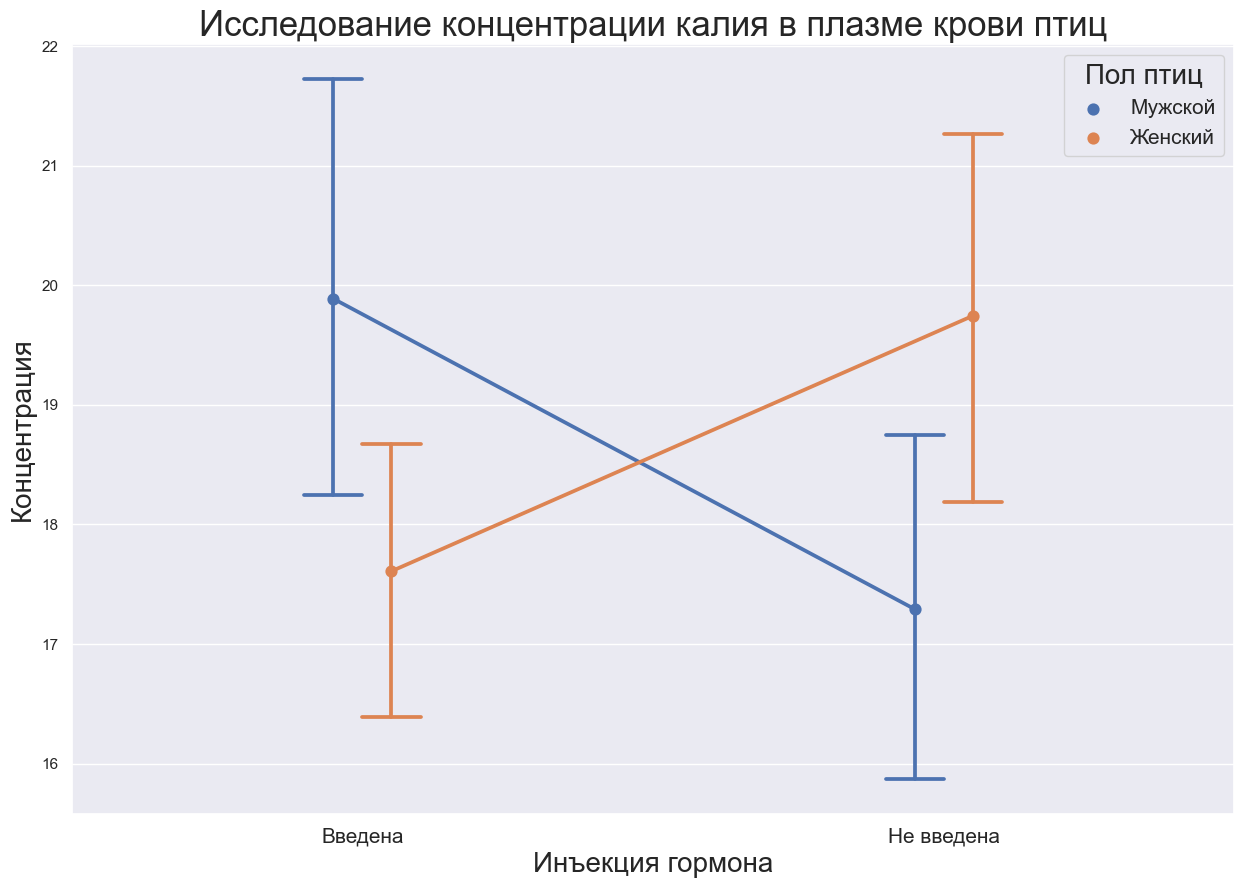

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# считываем файл
data1 = pd.read_csv('https://stepik.org/media/attachments/lesson/9250/birds.csv')

# задаем размеры выводимого графика
sns.set(rc={'figure.figsize':(15, 10)})

# строим график с помощью seaborn
pplot = sns.pointplot(x='hormone', y='var4', hue='sex', dodge=0.1, capsize=.1, data=data1)

# меняем названия титула, оси х и оси у
plt.title('Исследование концентрации калия в плазме крови птиц', fontsize=25)
plt.xlabel('Инъекция гормона', fontsize=20)
plt.ylabel('Концентрация', fontsize=20)

# меняем названия отложенных по оси х значений
bars = ('Введена', 'Не введена')
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars, fontsize=15)

# меняем "Легенду" та, что в верхнем правом углу
leg_handles = pplot.get_legend_handles_labels()[0]
pplot.legend(leg_handles, ['Мужской', 'Женский'], title='Пол птиц', title_fontsize=20, fontsize=15)



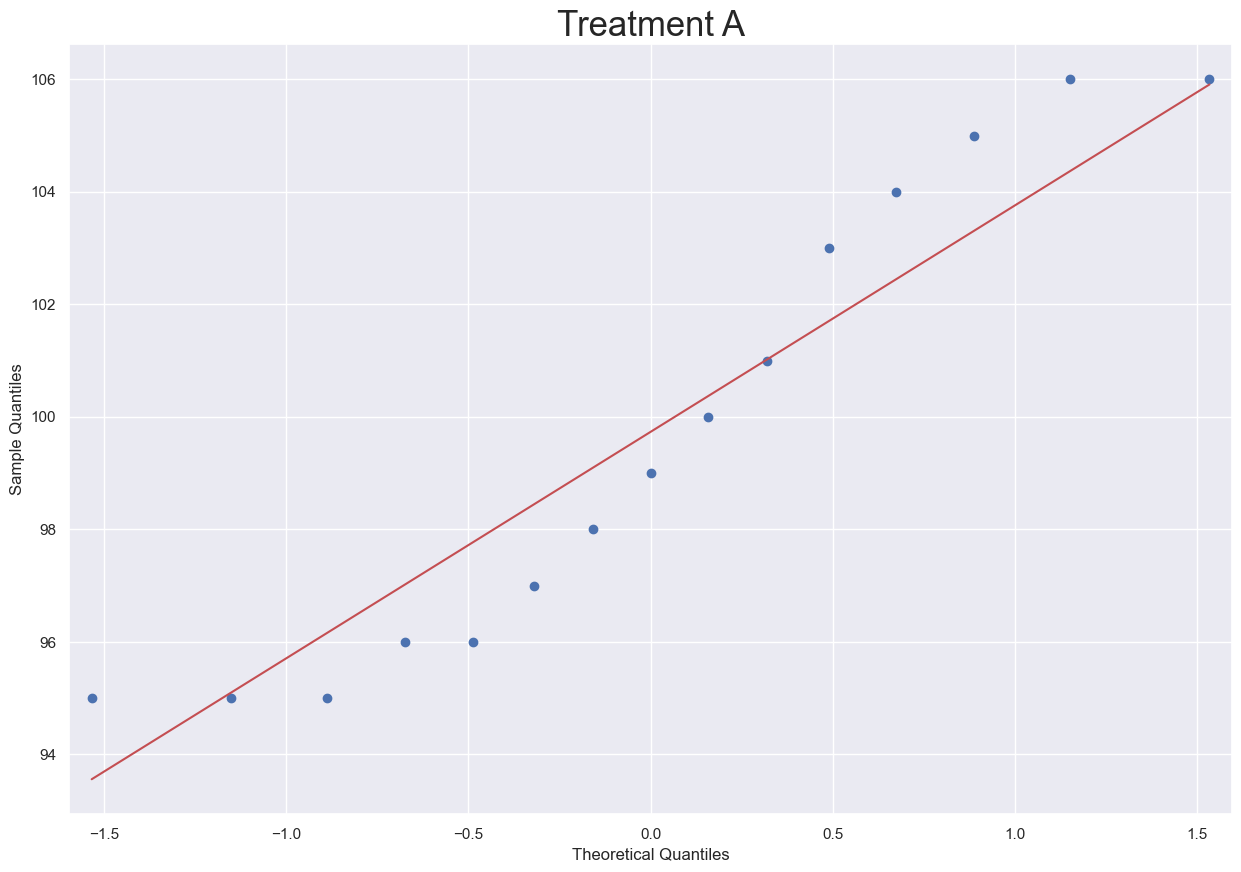

In [21]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

data1 = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')

# создаем отфильтрованный датасет, в котором есть только строки с Therapy == A
therA = data1[data1['Therapy']=='A']

# создаем QQ-plot с помощью statsmodels, в качестве аргумента 'expr' из отсортированного датасета
sm.qqplot(therA['expr'], line='s')

# добавляем название графика
plt.title('Treatment A', fontsize=25)

# выводим на экран 
plt.show()
# аналогично для терапии B, C, D

## Корреляция
### Ковариация
(ко - совместная, вариация - изменчивость). Мера **линейной** зависимости двух случайных величин.
Если ковариация положительна, то с ростом значений одной случайной величины, значения второй имеют тенденцию возрастать, а если знак отрицательный — то убывать.
$$ cov(X, Y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{x})}}{N - 1} $$
где N - количество случайных величин, а единица - количество степеней свободы.

 Однако только по **абсолютному** значению ковариации **нельзя судить** о том, **насколько сильно величины взаимосвязаны**, так как масштаб ковариации зависит от их дисперсий. Значение ковариации можно нормировать, поделив её на произведение среднеквадратических отклонений (квадратных корней из дисперсий) случайных величин. Полученная величина называется коэффициентом корреляции Пирсона, который всегда находится в интервале от −1 до 1:



$$ r(x, y) = \frac{cov(x, y)}{\sigma_x\sigma_y}$$

**Коэффициент корреляции:**  ${r_{xy}}$ - показатель силы и направления взаимосвязи 2 количественных переменных. [-1; 1] Знак кф-та показывает направление взаимосвязи.

**Коэффициент детерминации:** ${R^2}$ показывает в какой степени дисперсия одной переменный обусловлена влиянием другой переменной. Равен квадрату кф-та корреляции [0;1] 

"Важно понимать, что корреляционная зависимость отражает только взаимосвязь между переменными и не говорит о причинно-следственных связях. Например, если бы исследуемой выборке между ростом и весом человека существовала корреляционная зависимость то, это не значило бы, что вес является причиной роста человека, иначе сбрасывая лишние килограммы рост человека также уменьшался. Корреляционная связь лишь говорит о взаимосвязанности данных параметров, причем в данной конкретной выборке, в другой выборке мы можем не наблюдать полученные корреляции."

In [22]:
'''Демонстрация работы ковариации и корреляции'''
import numpy as np
import random as r

def cov(x, y):
    assert x.size == y.size
    return ((x - x.mean()) * (y - y.mean())).sum()/(x.size - 1)

def cor(x, y):
    return cov(x, y)/(np.std(x, ddof=1)*np.std(y, ddof=1))

# функция имитирущая случаные факторы
# р - настолько существенным будет случайный фактор
def randomize(arr, p):
    alpha = np.max(arr) - np.min(arr)
    res = np.zeros(arr.shape)
    for i, v in enumerate(arr):
        sign = 1 if r.choice([True, False]) else -1
        res[i] = v + sign*alpha*r.random()*p
    return res

In [23]:
x = np.array(range(30))
y = randomize(x, 0.1)
y1 = randomize(x, 0.5)
y2 = randomize(x, 1)

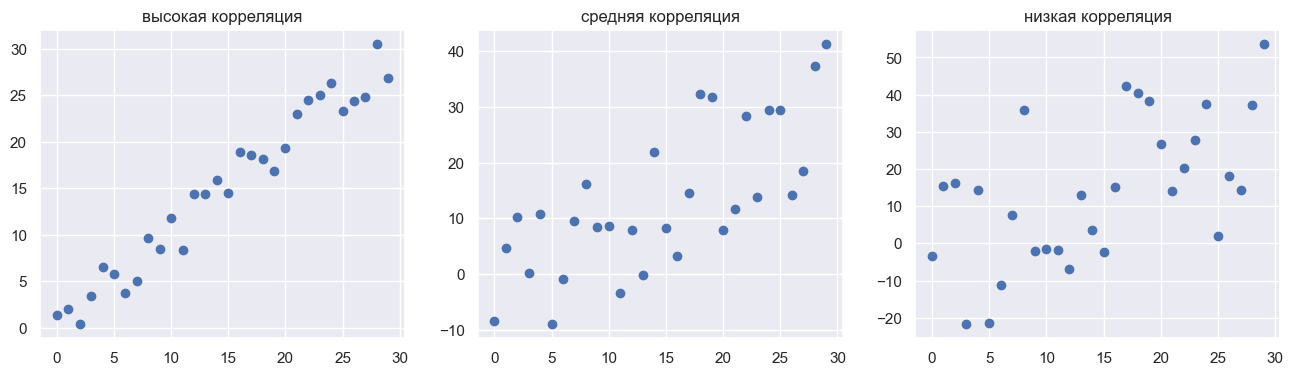

In [24]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
ax1.scatter(x, y)
ax2.scatter(x, y1)
ax3.scatter(x, y2)
ax1.set_title('высокая корреляция')
ax2.set_title('средняя корреляция')
ax3.set_title('низкая корреляция')
plt.show()

In [25]:
print(f'''
cov1: {cov(x, y):.2f}
cov2: {cov(x, y1):.2f}
cov3: {cov(x, y2):.2f}

cor1: {cor(x, y):.2f}
cor2: {cor(x, y1):.2f}
cor3: {cor(x, y2):.2f}
''')


cov1: 76.39
cov2: 85.23
cov3: 99.22

cor1: 0.98
cor2: 0.73
cor3: 0.58



In [26]:
from scipy import stats

A = """X Y
4 2
5 1
2 4
3 3
1 5"""

x, y = [], []

[(x.append(int(a[0])), y.append(int(a[2]))) for a in A.split('\n') if a[0].isdigit()]

print(stats.pearsonr(x,y)[0])

-1.0


**Коэффициент корреляции Пирсона (r-Пирсона)** применяется для исследования взаимосвязи двух переменных, измеренных в метрических шкалах на одной и той же выборке. Он позволяет определить, насколько пропорциональная изменчивость двух переменных. [-1; 1]

Коэффициент корреляции r-Пирсона характеризует существование линейной связи между двумя величинами. Если связь криволинейная то он не будет работать.

Чтобы приступать к расчетам коэффициента корреляции r-Пирсона необходимо выполнение следующих условий:
>Исследуемые переменные X и Y должны быть распределены нормально.

>Исследуемые переменные X и Y должны быть измерены в интервальной шкале или шкале отношений.

>Количество значений в исследуемых переменных X и Y должно быть одинаковым.

>При расчете коэффициент линейной корреляции Пирсона используется специальная формула. Величина коэффициента корреляции варьируется от 0 до 1

Слабыми сторонами линейного коэффициента корреляции Пирсона являются:
Неустойчивость к выбросам.
С помощью коэффициента корреляции Пирсона можно определить только силу линейной взаимосвязи между переменными, другие виды взаимосвязей выявляются методами регрессионного анализа.

## Регрессия с одной независимой переменной

**Одномерный регрессионный анализ**, который позволяет проверять гипотезы о взаимосвязи одной  количественной зависимой переменной и нескольких независимых.
Простая **линейная регрессия**, при помощи которой можно исследовать взаимосвязь двух переменных.
Линейная регрессия (англ. Linear regression) — используемая в статистике регрессионная модель зависимости одной (объясняемой, зависимой) переменной $y$ от другой или нескольких других переменных (факторов, регрессоров, независимых переменных) $x$ с **линейной функцией зависимости**.


 В общем виде функция линейной регрессии выглядит как:
$$ y = b_0 + b_1x $$
$b_0$ - intercept значение пересечения линии с осью Y 
$b_1$ - slope задаёт наклон линии регрессии 
строят регрессионную прямую методом наименьших квадратов (МНК) 
МНК - это способ нахождения оптимальных параметров линейной регресссии ($b_0$,  $b_1$), таких, что сумма квадратов ошибок (остатков) была минимальная. 
Расчёт параметров идёт по таким формулам: 
$$ b_1 = \frac{sd_y}{sd_x}r_{xy} $$
$$ b_0 = \bar{Y} - b_1\bar{X} $$

Если коэффициент корреляции между двумя переменными равен нулю, и обе переменные представлены в z - значениях, то уравнение регрессии примет вид y = 0
Мы рассчитываем коэффициенты регрессионной прямой таким образом, чтобы минимизировать сумму квадратов остатков


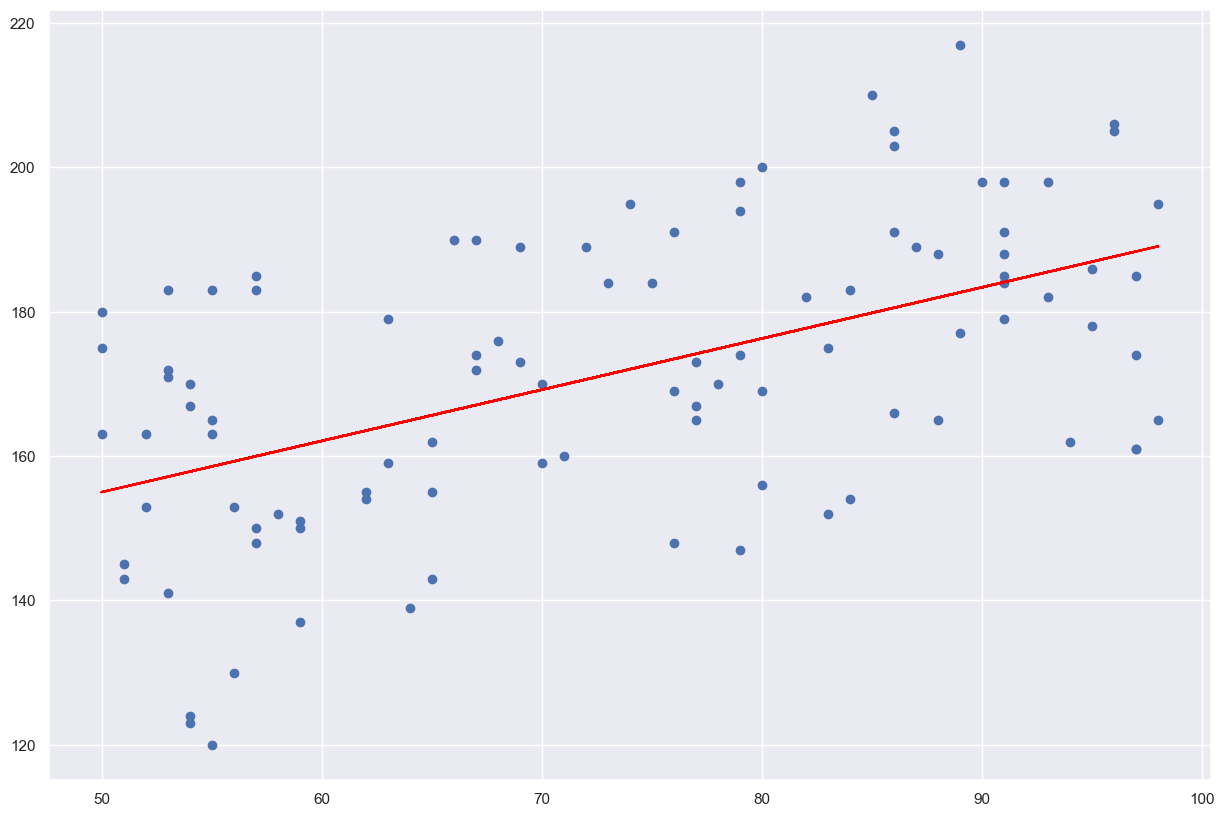

In [27]:
import matplotlib.pyplot as plt
import numpy as np

N = 100

x = np.array([np.random.randint(50,100) for i in range(N)])
y = np.array([i+np.random.randint(80,120)-np.random.randint(-20,20) for i in x])

plt.scatter(x, y)
b1, b0 = np.polyfit(x, y, 1) #  b0 - intercept, b1 - slope
plt.plot(x, b0 + b1*x, color='red')
plt.show()

## Гипотеза о значимости взаимосвязи и коэффициент детерминации 

### Условия применения линейной регрессии с одним предиктором

### Применение регрессионного анализа и интерпретация результатов

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('data/states.csv')
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


 Есть данные по штатам с различными значениями:
  - **metro_res** - процент населения живущие в столице
  - **white** - процент белого населения
  - **hs_grad** - процент людей со образованием
  - **poverty** - уровень бедности
  - **female_house** - процент домов, где есть домохозяйки 
  
 Исследуем связь уровня образования и бедности, где бедность будет ЗП, а уровень образования НП.
 Первое, что нам необходимо сделать, это построить линейную модель, которая наилучшим образом будет описывать наши данные.
 
 $$ \hat{y} = b_0 + b_1x $$
 
 Далле, построив нашу модель, нам надо узнать, насколько хорошо наша объясняет ЗП, для этого найдём коэфицент детерминации $R^2$
 
 Проверим нулевую гипотезу:
 $$ b_1 = 0 : H0$$
 
 Третья наша задача, это задача предсказания, по данным НП мы хотим предсказать ЗП.

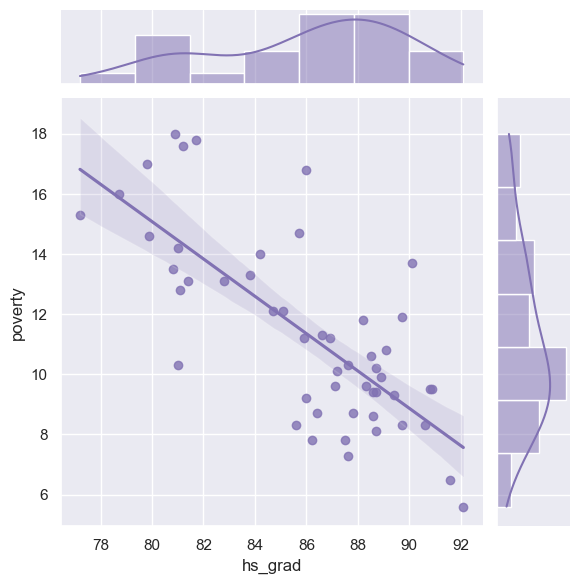

In [29]:
sns.jointplot(x='hs_grad', y='poverty', data=df, kind='reg', color='m')

In [30]:
df_descr = df.describe().transpose()
df_descr

,count,mean,std,min,25%,50%,75%,max
metro_res,51.0,72.249020,15.275894,38.2,60.80,71.6,86.80,100.0
white,51.0,81.719608,13.897223,25.9,76.80,85.4,90.25,97.1
hs_grad,51.0,86.011765,3.725998,77.2,83.30,86.9,88.70,92.1
poverty,51.0,11.349020,3.099185,5.6,9.25,10.6,13.40,18.0
female_house,51.0,11.633333,2.356155,7.8,9.55,11.8,12.65,18.9


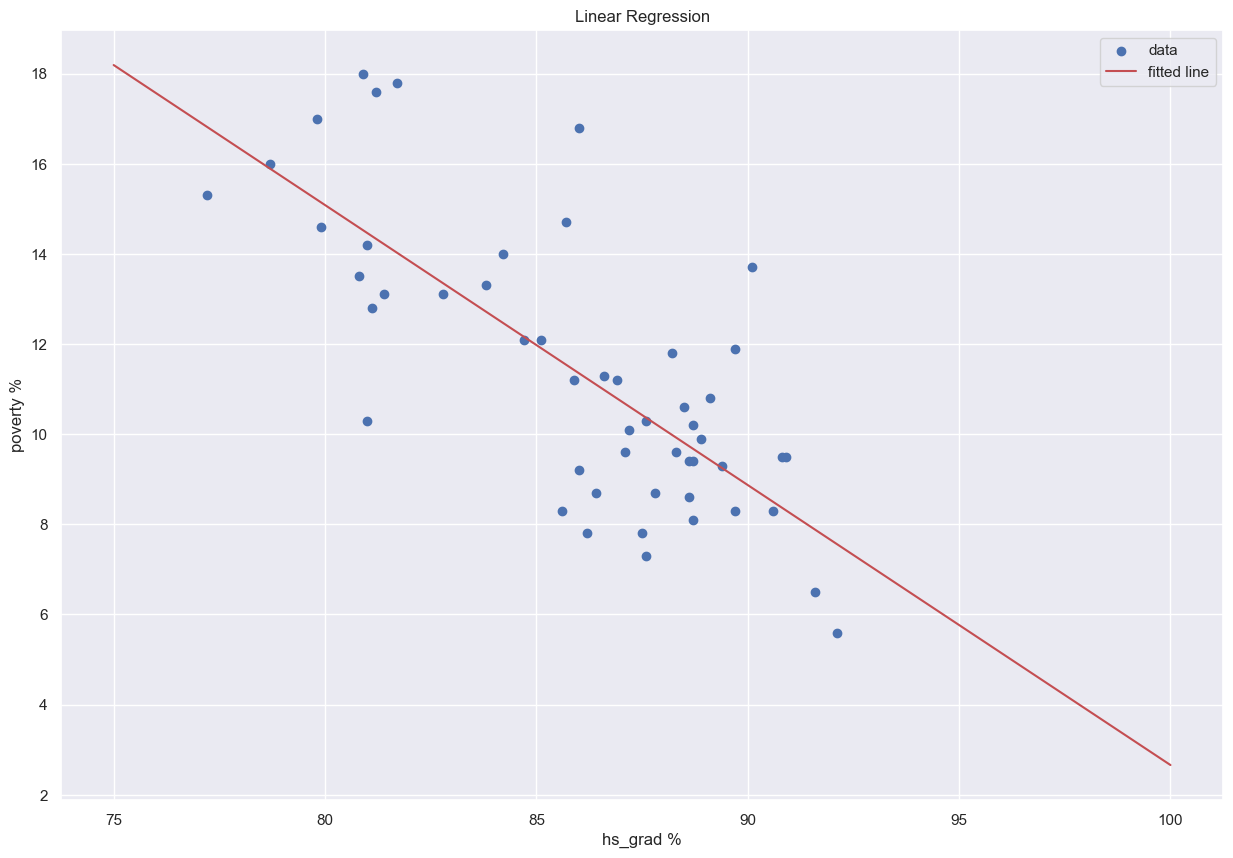

In [31]:
'''Построим модель'''
from scipy.stats import linregress

slope, intercept, r, p, std_err =  linregress(df['hs_grad'], df['poverty'])

x = np.linspace(75, 100)

reg = lambda x: intercept + slope*x
plt.scatter(x='hs_grad', y='poverty', data=df, label='data')
plt.xlabel('hs_grad %')
plt.ylabel('poverty %')
plt.title('Linear Regression')
plt.plot(x, reg(x), color='r', label='fitted line')
plt.legend()
plt.show()

In [32]:
print(f'''
slope = {slope:.2f}
intercept = {intercept:.2f}
r = {r:.2f}
r squared = {(r ** 2):.2f}
p = {p:.5f}
std_err = {std_err:.3f}
''')


slope = -0.62
intercept = 64.78
r = -0.75
r squared = 0.56
p = 0.00000
std_err = 0.079



**Корреляционная прямая** показывает направление (положительное или отрицательное) и "силу" взаимосвязи. Но в полной мере она входные данные не описывает. 
**Регрессионная прямая** описывает наши данные, поэтому на основе этой прямой мы можем предсказывать и те данные, которых не было во входных.

>Например: у нас есть данные о цене и площади квартир в каком-то районе. Корреляционная прямая может показать нам взаимосвязь площади квартиры с её ценой и мы, например, можем узнать, что чем больше площадь - тем выше цена. Но если бы нас попросили определить цену для какой-то квартиры - мы бы не смогли сделать это с помощью этой прямой. Тогда бы мы построили регрессионную прямую, которая показывает как площадь квартиры влияет на её стоимость. И если для какой-то квартиры (которой не было во входных данных) в этом районе нам известна площадь, а цена не известна, то мы можем использовать регрессионную прямую, чтобы "определить" цену на эту квартиру (с какой-то степенью точности).

***Применение регрессионного анализа и интерпретация результатов***


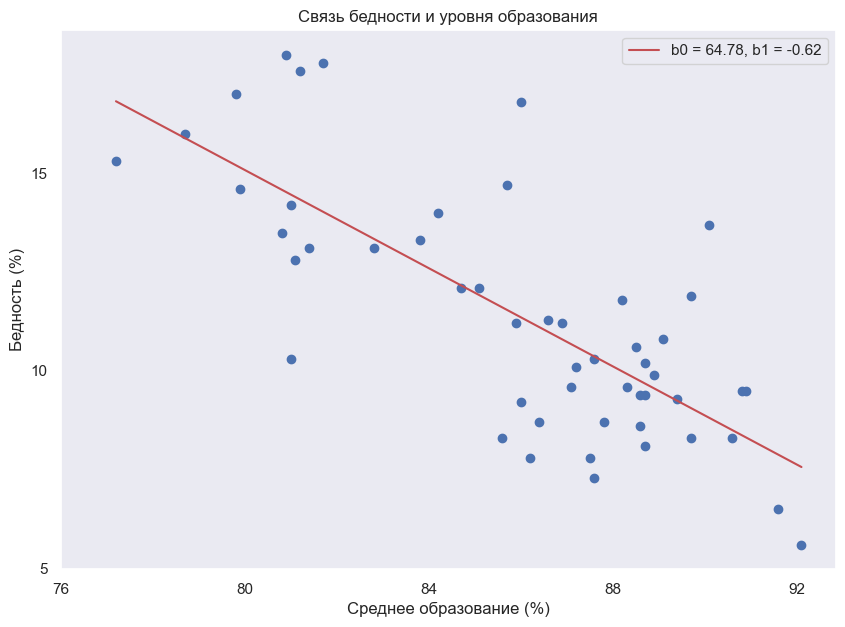

             Estimate  Std.Error  t value      Pr(>|t|)
(Intercept)   64.7810     6.8026     9.52  9.940660e-13
hs_grand      -0.6212     0.0790    -7.86  3.108830e-10

Multiple R-squared: 0.5578,
F-statistic(1,49) = 61.81, p-value = 3.10882981031842e-10


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

data=pd.read_csv('data/states.csv', sep=',')

# расчёт ковариационной матрицы двух векторов, на выходе ковариация и дисперсии каждого из массивов, 
# или можно рассчитать вручную по формулам из уроков cov - урок 3_1 третье видео; D - урок 1_5 третье видео
X = data['hs_grad']
Y = data['poverty']
ssxm, ssxym, ssyxm, ssym = np.cov(X,Y).flat

# рассчет корреляции по формуле из урока 3_1 третье видео: r = cov/stdx*stdy, 
# т. к. в ковариационной матрице у нас дисперсии, то в знаменателе нужно взять квадратный корень 
if ssxm == 0 or ssym == 0:
    r = 0
else:
    r = ssxym / (ssxm * ssym)**0.5
    
# расчет slope и intercept из урока 3_3 второе видео: slope = (stdy/stdx) * r
slope = r * (ssym/ssxm)**0.5
intercept = np.mean(Y) - slope * np.mean(X)

df = len(X) - 2
# рассчет t - значения, вероятности p и стандартной ошибки для X параметра 
tx = r * np.sqrt(df / ((1.0 - r)*(1.0 + r)))
sterrestx = np.sqrt((1 - r**2) * ssym / ssxm / df)
px = 2 * stats.t.sf(np.abs(tx), df)

# Находим сумму квадратов по параметру X
s = [i**2 for i in X]
sterresty = (sterrestx**2/51*sum(s))**0.5

# рассчет t - значения, вероятности p и стандартной ошибки для Y параметра подсмотренно тут: 
ty = intercept/sterresty
py = 2 * stats.t.sf(np.abs(ty), df)

# рассчет F-статистики
F = r**2/(1-r**2)*df
p_val = stats.f.sf(F, 1, df)

# создаем таблицу как в лекции
ttlinear = pd.DataFrame(data = {
    'Estimate':[round(num, 4) for num in [intercept,slope]], 'Std.Error':[round(num, 4) for num in [sterresty, sterrestx]], 
    't value':[round(num, 2) for num in [ty,tx]], 'Pr(>|t|)':[py,px]}, 
                        index = ['(Intercept)','hs_grand'])

# вычисляем остатки
#residuals = Y - intercept - slope*X

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# точечный график
ax1.scatter(X,Y)

# регрессионная прямая
x1=np.linspace(min(X),max(X),51)
y1=intercept + slope*x1
plt.plot(x1,y1,'-r',label='b0 = {}, b1 = {}'.format(round(intercept,2), round(slope,2)))

plt.grid()
plt.title('Связь бедности и уровня образования')
plt.xlabel('Среднее образование (%)')
plt.ylabel('Бедность (%)')
plt.xticks(np.arange(76,93, step=4))
plt.yticks(np.arange(5,18, step=5))
plt.legend(loc='upper right')
plt.show()


print(ttlinear)
print('')
print('Multiple R-squared: {},'.format(round(r**2,4)))
print('F-statistic(1,{}) = {}, p-value = {}'.format(df, round(F,2), p_val))

***2-й способ для королей ***

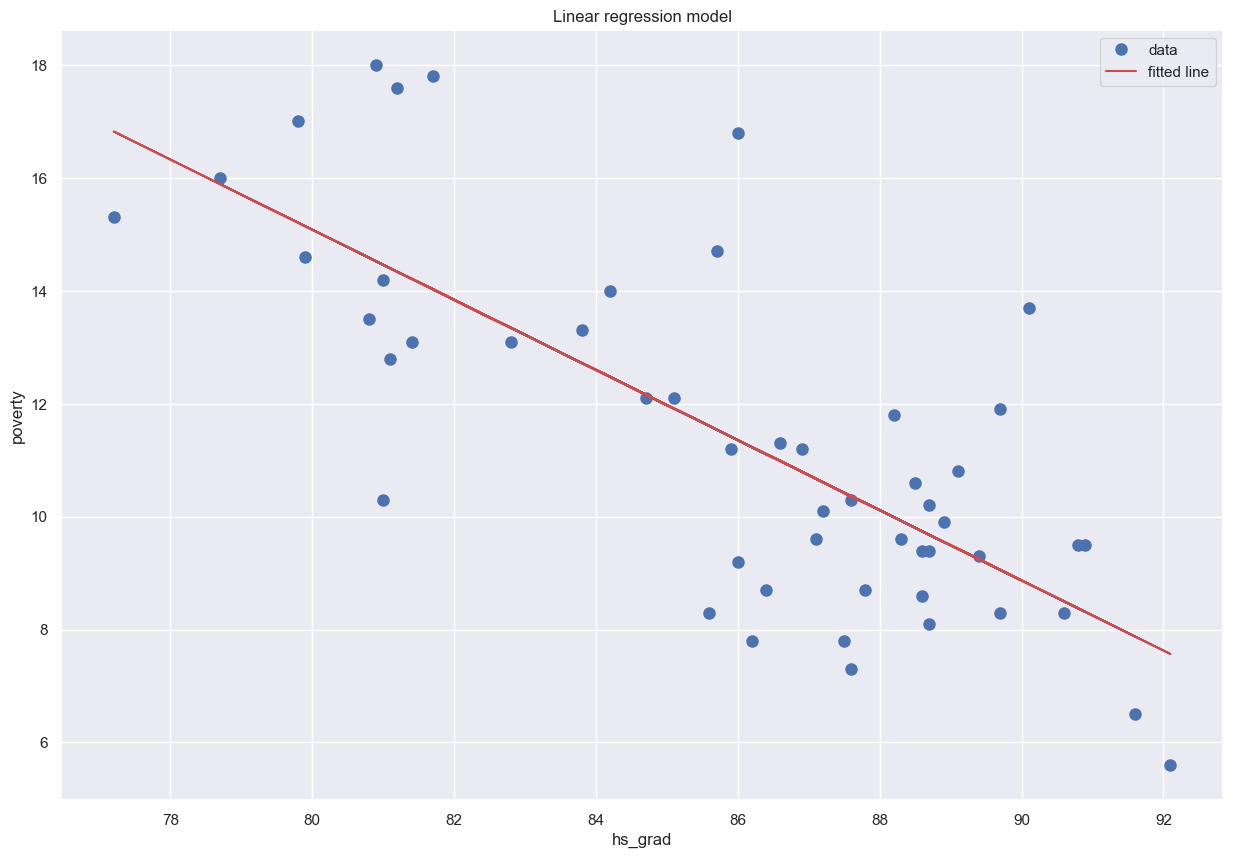

In [34]:
from scipy.stats import linregress
data=pd.read_csv('data/states.csv', sep=',')

slope, intercept, r_value, p_value, std_err = linregress(data['hs_grad'], data['poverty'])
plt.title("Linear regression model")
plt.xlabel("hs_grad") 
plt.ylabel("poverty")
plt.plot(data['hs_grad'], data['poverty'], 'o', markersize="8", label='data')
plt.plot(data['hs_grad'], intercept + slope*data['hs_grad'], 'r', label='fitted line') 
plt.legend() 
plt.show()

Основываясь на итоговой регрессионной модели, давайте вновь выполним задачу предсказания. Какой процент людей, проживающих в бедности, ожидается, если :
>процент людей со средним образованием (hs_grad) равен 90;

>процент людей, проживающих в столичной области (metro_res), равен 80;

>процент белокожего населения (white) равен 50.

In [35]:
import pandas as pd
import statsmodels.formula.api as smf

url = 'https://stepik.org/media/attachments/lesson/8086/states.csv'
df = pd.read_csv(url)

model = smf.ols(formula="poverty ~ metro_res + white + hs_grad", data=df).fit()
print(model.summary())

p = pd.DataFrame({'metro_res': [80], 'white': [50],'hs_grad': [90]})
print(model.predict(p))



                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     28.00
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           1.55e-10
Time:                        22:29:24   Log-Likelihood:                -103.41
No. Observations:                  51   AIC:                             214.8
Df Residuals:                      47   BIC:                             222.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.7220      6.389     10.756      0.0